In [20]:
import os
import os.path as osp
import torch_geometric as pyg
import pandas as pd
import torch
import collections
import seaborn as sns
import collections

In [21]:
perf_dirs = "../FreeTickets/results/cifar10/performance/10h24m17s_on_Aug_07_2022/dst/from_init"
graph_dirs = "../graphs/resnet34/cifar10/original"

perf_dirs_rm = "../FreeTickets/results/cifar10/performance/10h24m17s_on_Aug_07_2022/rm/from_init"
graph_dirs_rm = "../graphs/resnet34/cifar10/rm"

In [22]:
def get_layers_df(graph_dirs, perf_dirs):
    layers_df = collections.defaultdict(list)
    for mask in os.listdir(graph_dirs):
        csv = pd.read_csv(osp.join(perf_dirs, mask + ".csv"))
        graphs = torch.load(osp.join(graph_dirs, mask))
        
        
        for layer, info in graphs.items():
            (sm, rm, t1m),(sw, rw, t1w) = info['ram_scores']
            layers_df['mask_no'].append(int(mask.split('.')[0].split('_')[0]))
            layers_df['layer'].append(layer)
            layers_df['sparsity'].append(info['sparsity'])
            layers_df['sm'].append(sm)
            layers_df['rm'].append(rm)
            layers_df['sw'].append(sw)x
            layers_df['rw'].append(rw)
            layers_df['t1m'].append(t1m)
            layers_df['t1w'].append(t1w)
            #
            # graph = info['graph']
            # degree = pyg.utils.degree(graph.edge_index[0], graph.num_nodes)
            # d_avg_l = degree[0:info['dim_in']].mean().item()
            # d_avg_r = degree[info['dim_in']::].mean().item()
            # layers_df['left_deg'].append(d_avg_l / info['dim_out'])
            # layers_df['right_deg'].append(d_avg_r / info['dim_in'])

            layers_df['perf'].append(csv.val_acc.max())
             
    layers_df = pd.DataFrame.from_dict(layers_df)
    mask_df = collections.defaultdict(list)
    for mask in layers_df.mask_no.unique():
        tab = layers_df.loc[layers_df.mask_no == mask]
        tab = tab.drop(columns=['layer'])
        mask_df['mask_no'].append(mask)
        for k in tab.keys():
            if k == 'mask_no': continue
            mask_df[k].append(tab[k].mean())
    mask_df = pd.DataFrame.from_dict(mask_df)
    
    return layers_df, mask_df

In [23]:
cifar10_l, cifar10_m = get_layers_df(graph_dirs, perf_dirs)
cifar100_l, cifar100_m = get_layers_df(graph_dirs_rm, perf_dirs_rm)

In [26]:
def plot_m(m):
    g = sns.FacetGrid(pd.melt(m, 'mask_no'), col="variable", sharey=False)
    g.map(sns.lineplot, 'mask_no', 'value')

In [27]:
def plot_l(l):
    g = sns.FacetGrid(pd.melt(l, ['mask_no', 'layer']), col="variable", row='layer', sharey=False, height=2.2, aspect=1.75)
    g.map(sns.lineplot, 'mask_no', 'value')

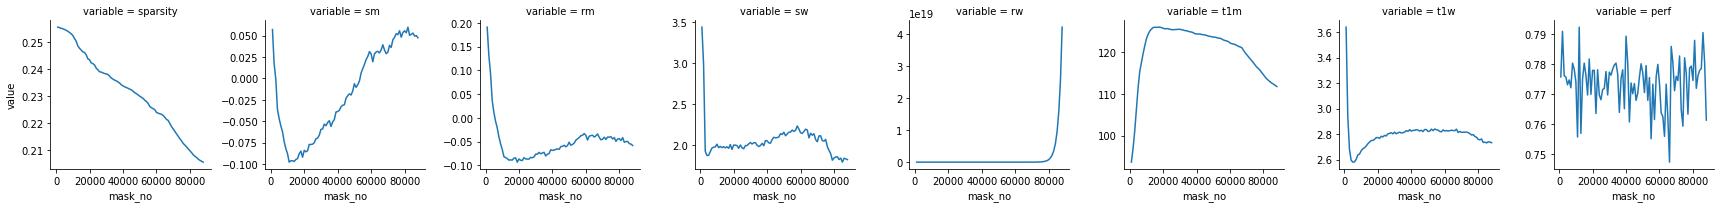

In [28]:
plot_m(cifar10_m)

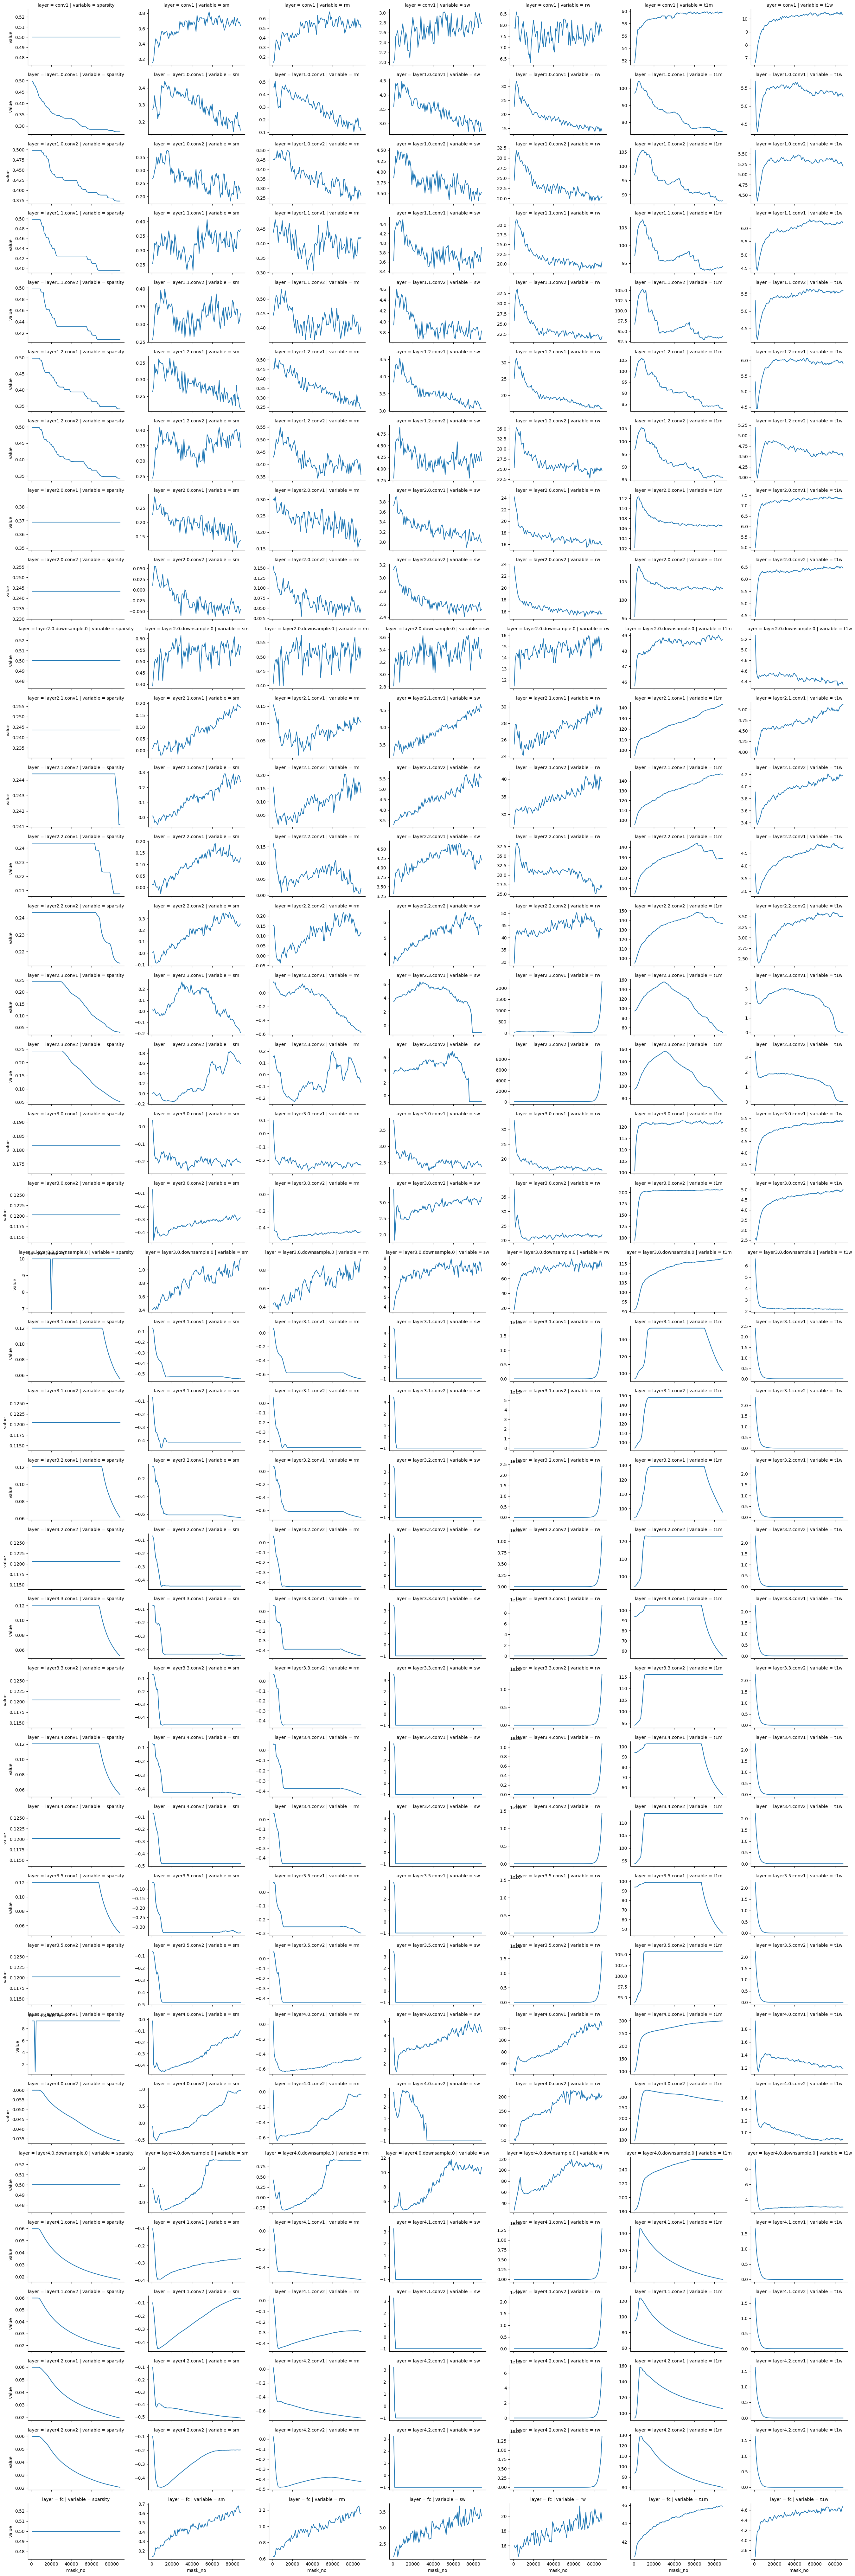

In [29]:
cifar10_lb = cifar10_l.drop(columns=['perf'])
plot_l(cifar10_lb)